In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# want to min_{{y_i}} E_X[ min_{y_i} || x - y_i || ]
# so, since we don't wanna do the math, we just take the MC estimate of this expectation
M = 5_000

# uniform circle distribution
def circle_sample(k):
    length = np.random.uniform(0, 1, k)
    angle = np.pi * np.random.uniform(0, 2, k)

    x = np.sqrt(length) * np.cos(angle)
    y = np.sqrt(length) * np.sin(angle)

    return np.vstack((x,y)).T

# uniform rectangle
def rect_sample(k):
    return np.random.uniform(low=[0, 0], high=[1, 1], size=(k, 2))

In [35]:
M = 10_000
N = 1

samples = circle_sample(M)      # used for Monte Carlo estimate
rps = circle_sample(N)  # number of RPs

In [38]:
trajectory = []
eta = 0.01
T = 500_000

for _ in range(T):
    proposed_rps = rps + eta * np.random.randn(1, 2)
    if np.sum(proposed_rps ** 2) < 1:
        rps = proposed_rps
        trajectory.append(rps.copy())
trajectory = np.array(trajectory)

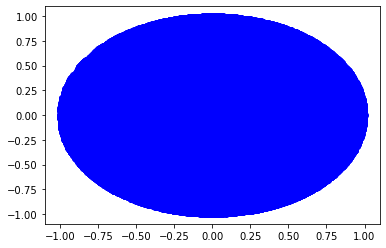

In [39]:
plt.scatter(trajectory[:,0,0], trajectory[:,0,1], color="b")